In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame

print(df.columns.tolist())
df.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
description = df.describe()
print(description)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [4]:
dimensions = df.shape
print(dimensions)

(150, 5)


In [5]:
filtered_df = df[df['sepal length (cm)'] > 5.0]
print(filtered_df.head())

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
10                5.4               3.7                1.5               0.2   
14                5.8               4.0                1.2               0.2   
15                5.7               4.4                1.5               0.4   

    target  
0        0  
5        0  
10       0  
14       0  
15       0  


In [6]:
df.rename(columns={
    'sepal length (cm)': 'SepalLengthCm',
    'sepal width (cm)': 'SepalWidthCm',
    'petal length (cm)': 'PetalLengthCm',
    'petal width (cm)': 'PetalWidthCm',
    'target': 'Species'
}, inplace=True)

df['PetalRatio'] = df['PetalLengthCm'] / df['PetalWidthCm']

df = df[df['SepalLengthCm'] >= 5.0]

if 'SepalWidthCm' in df.columns:
    df = df.drop(columns=['SepalWidthCm'])

print(df.columns.tolist())
df.head()

['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species', 'PetalRatio']


,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species,PetalRatio
0,5.1,1.4,0.2,0,7.00
4,5.0,1.4,0.2,0,7.00
5,5.4,1.7,0.4,0,4.25
7,5.0,1.5,0.2,0,7.50
10,5.4,1.5,0.2,0,7.50


In [7]:
species_map = dict(enumerate(iris.target_names))
df['Species'] = df['Species'].map(species_map)
df_setosa = df[df['Species'] == 'setosa']

In [8]:
species_counts = df['Species'].value_counts()

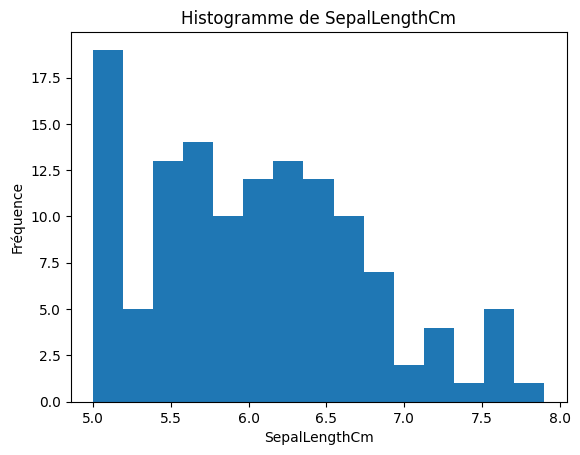

In [9]:
plt.hist(df['SepalLengthCm'], bins=15)
plt.title("Histogramme de SepalLengthCm")
plt.xlabel("SepalLengthCm")
plt.ylabel("Fréquence")
plt.show()

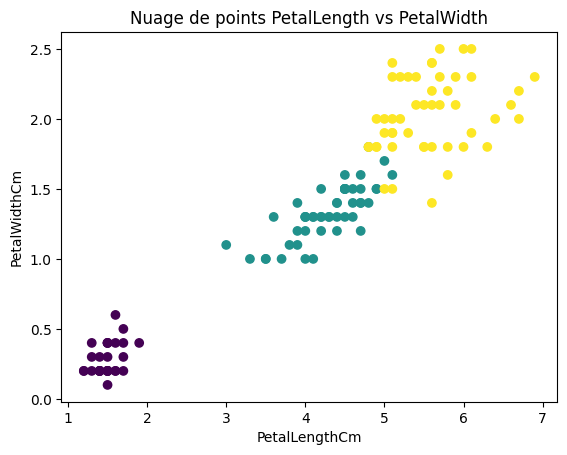

In [12]:
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=df['Species'].map({'setosa':0,'versicolor':1,'virginica':2}))
plt.title("Nuage de points PetalLength vs PetalWidth")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.show()

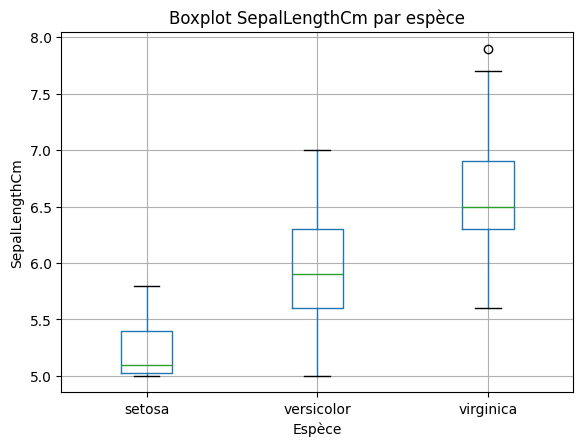

In [11]:
df.boxplot(column='SepalLengthCm', by='Species')
plt.title("Boxplot SepalLengthCm par espèce")
plt.suptitle("")
plt.xlabel("Espèce")
plt.ylabel("SepalLengthCm")
plt.show()